In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
sns.set_style("whitegrid")
sns.set_palette("husl")

df = pd.read_csv('..\\data\\cleaned\\data.csv')
df.tail()

graph_directory = "..\\visualizations\\eda\\"

In [4]:
print("Dataset Overview:")
print("-" * 50)
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nUnique Cities:", df['city'].nunique())

print("\nMissing Values:\n", df.isnull().sum())

print("\nNumerical Columns Statistics:\n", df.describe())

Dataset Overview:
--------------------------------------------------

Dataset Shape: (11704, 9)

Columns: ['area', 'city', 'floor', 'location', 'price', 'rooms', 'source', 'square_price', 'title']

Data Types:
 area              int64
city             object
floor           float64
location         object
price             int64
rooms           float64
source           object
square_price      int64
title            object
dtype: object

Unique Cities: 80

Missing Values:
 area            0
city            0
floor           0
location        0
price           0
rooms           0
source          0
square_price    0
title           0
dtype: int64

Numerical Columns Statistics:
                area         floor         price         rooms  square_price
count  11704.000000  11704.000000  1.170400e+04  11704.000000  11704.000000
mean      67.707536      1.687286  1.648675e+05      2.573864   2366.742481
std       34.279002      3.109002  1.452113e+05      1.091530    938.776343
min       1

In [5]:
distinct_values = {col: df[col].dropna().unique().tolist() for col in df.columns}

for col, values in distinct_values.items():
    if col in ["floor", "rooms", "source"]:
        print(f"{col}: {values}")

floor: [3.0, 2.0, 1.0, 4.0, 0.0, 9.0, 6.0, 5.0, 0.5, 11.0, -3.0, 7.0, 15.0, -0.5, 8.0, 16.0, 10.0, 17.0, 25.0, 18.0, 12.0, 14.0, 23.0, 29.0, 27.0, 13.0, 19.0, 26.0, 20.0, 24.0, 22.0]
rooms: [2.0, 1.5, 4.0, 3.0, 2.5, 3.5, 1.0, 4.5, 6.0, 0.5, 5.0, 5.5, 8.0, 7.0]
source: ['halooglasi', '4zida']


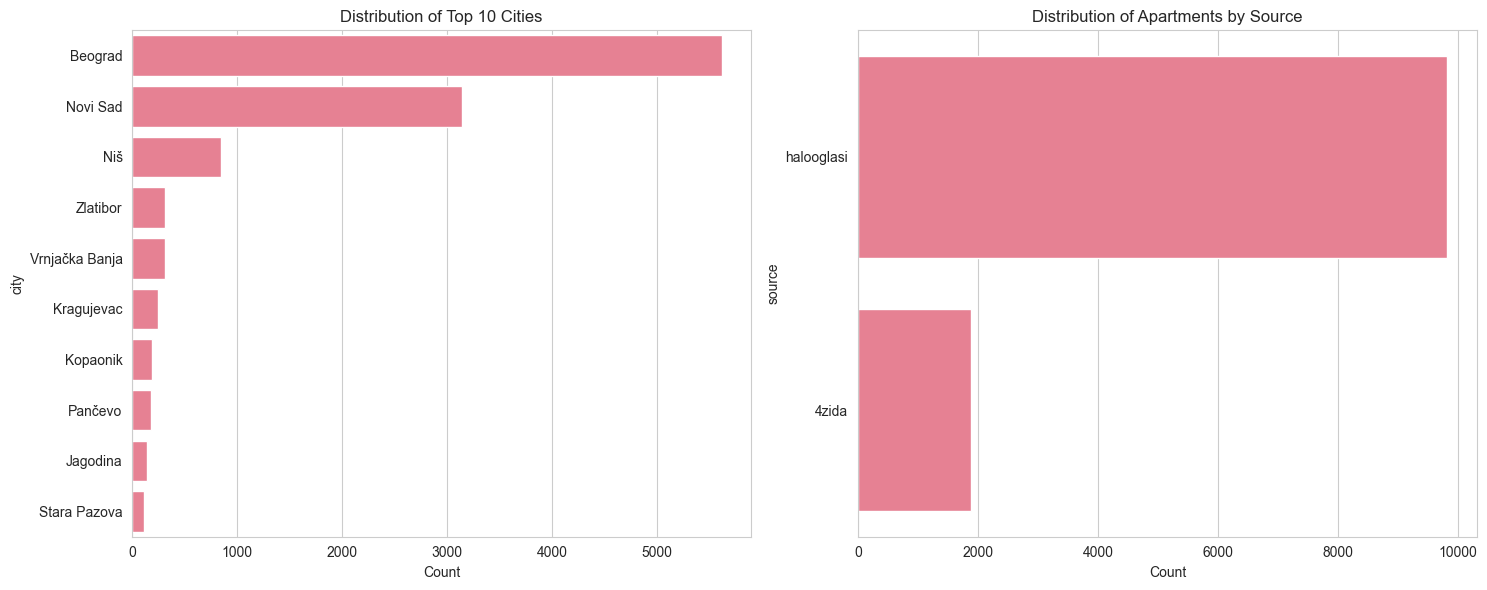


Top 10 Cities Distribution (%):
city
Beograd           48.00
Novi Sad          26.84
Niš                7.21
Zlatibor           2.68
Vrnjačka Banja     2.67
Kragujevac         2.08
Kopaonik           1.64
Pančevo            1.56
Jagodina           1.23
Stara Pazova       0.98
Name: proportion, dtype: float64

Source Distribution (%):
source
halooglasi    83.95
4zida         16.05
Name: proportion, dtype: float64


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

city_counts = df['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, ax=axes[0])
axes[0].set_title('Distribution of Top 10 Cities')
axes[0].set_xlabel('Count')

source_counts = df['source'].value_counts()
sns.barplot(x=source_counts.values, y=source_counts.index, ax=axes[1])
axes[1].set_title('Distribution of Apartments by Source')
axes[1].set_xlabel('Count')

plt.tight_layout()
output = "cities and source distribution"
plt.savefig(graph_directory + output)
plt.show()

print("\nTop 10 Cities Distribution (%):")
print(df['city'].value_counts(normalize=True).head(10).multiply(100).round(2))

print("\nSource Distribution (%):")
print(df['source'].value_counts(normalize=True).multiply(100).round(2))

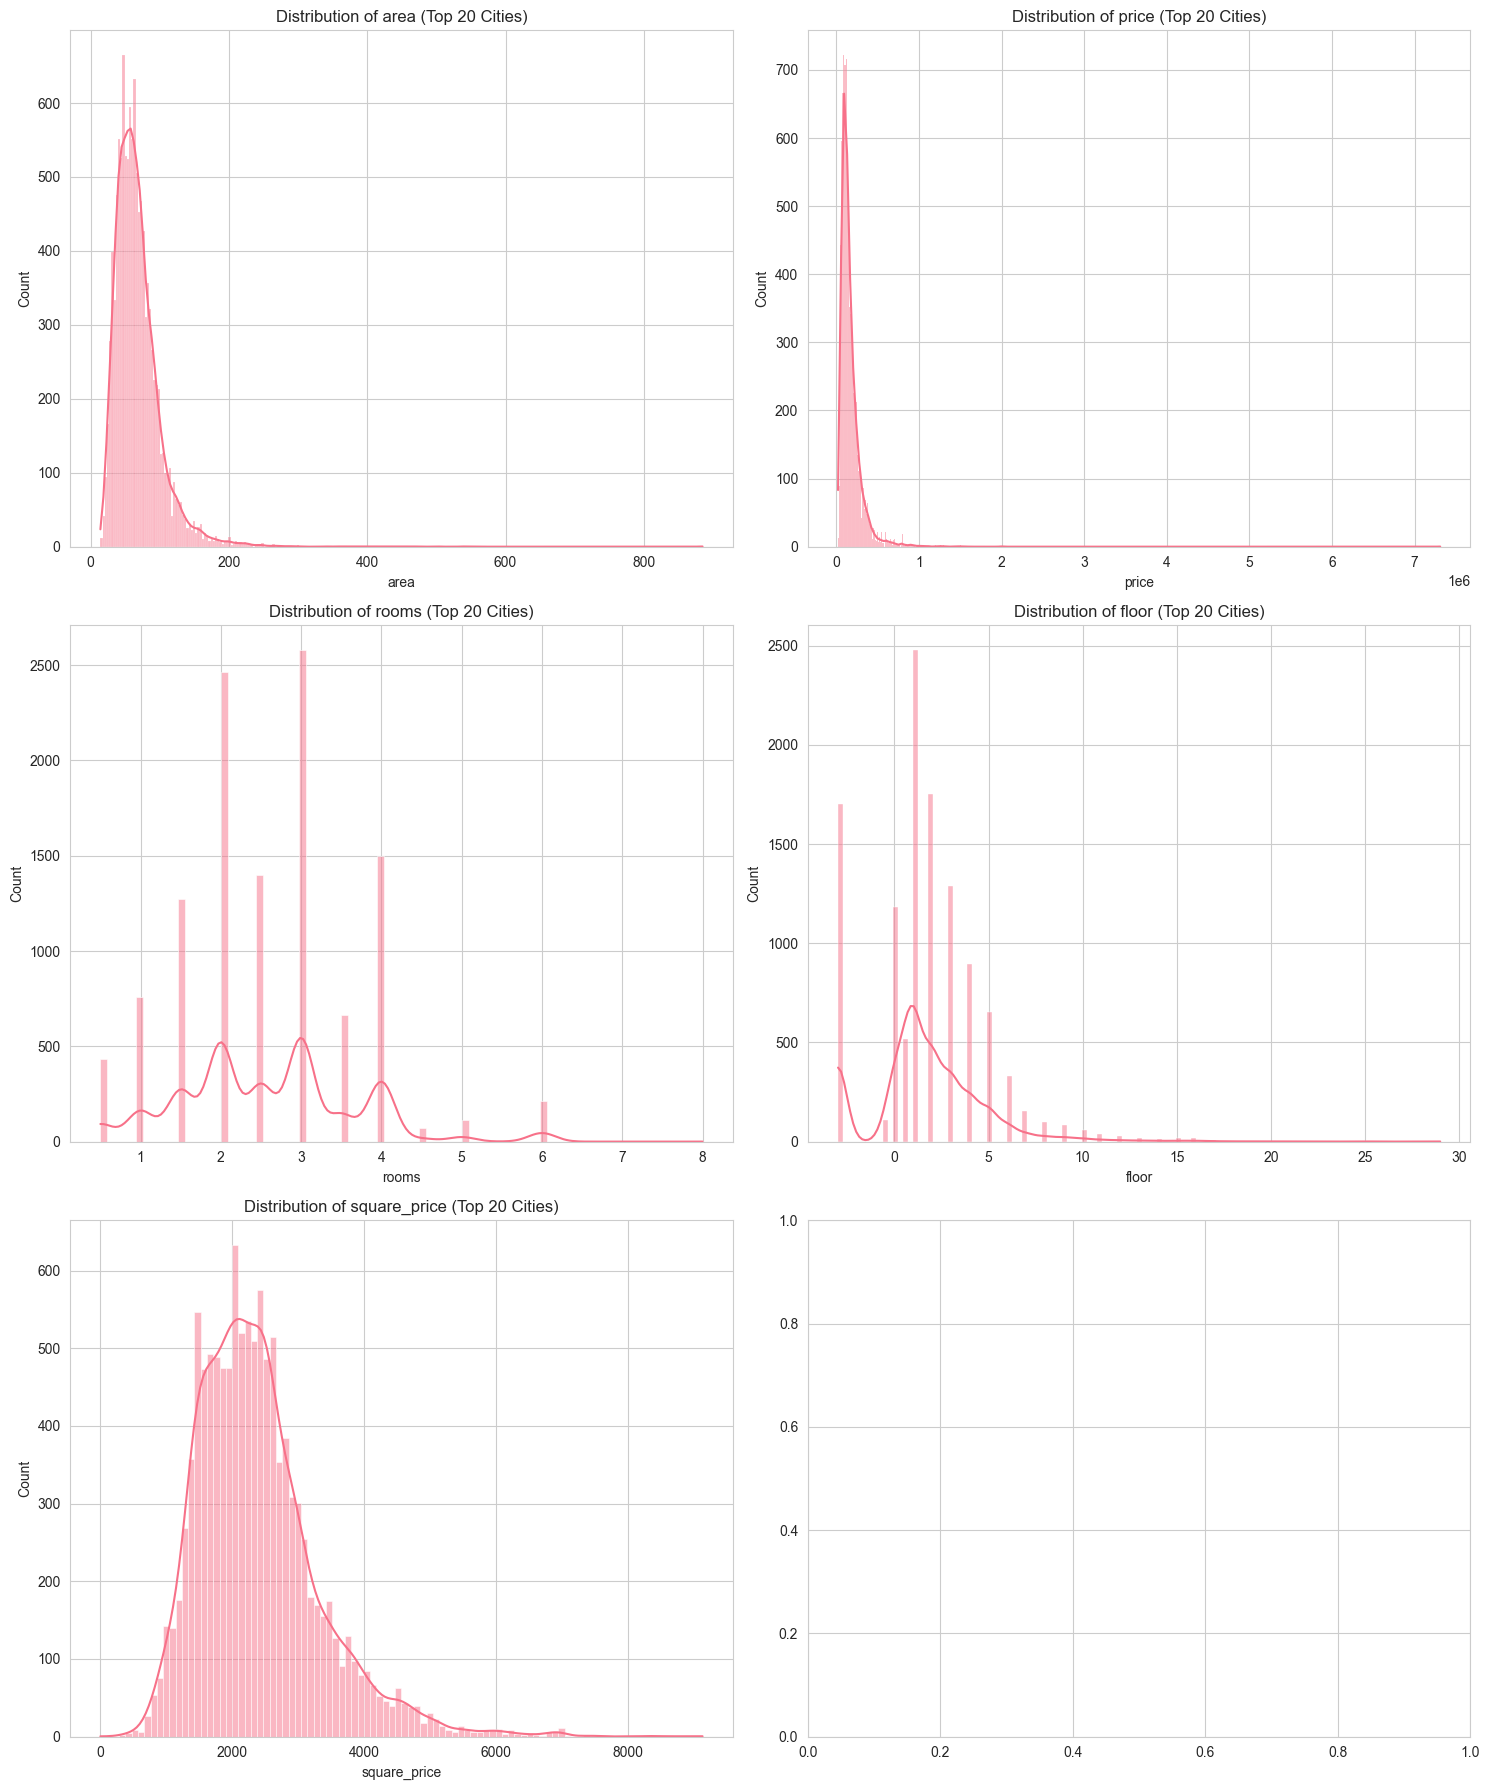

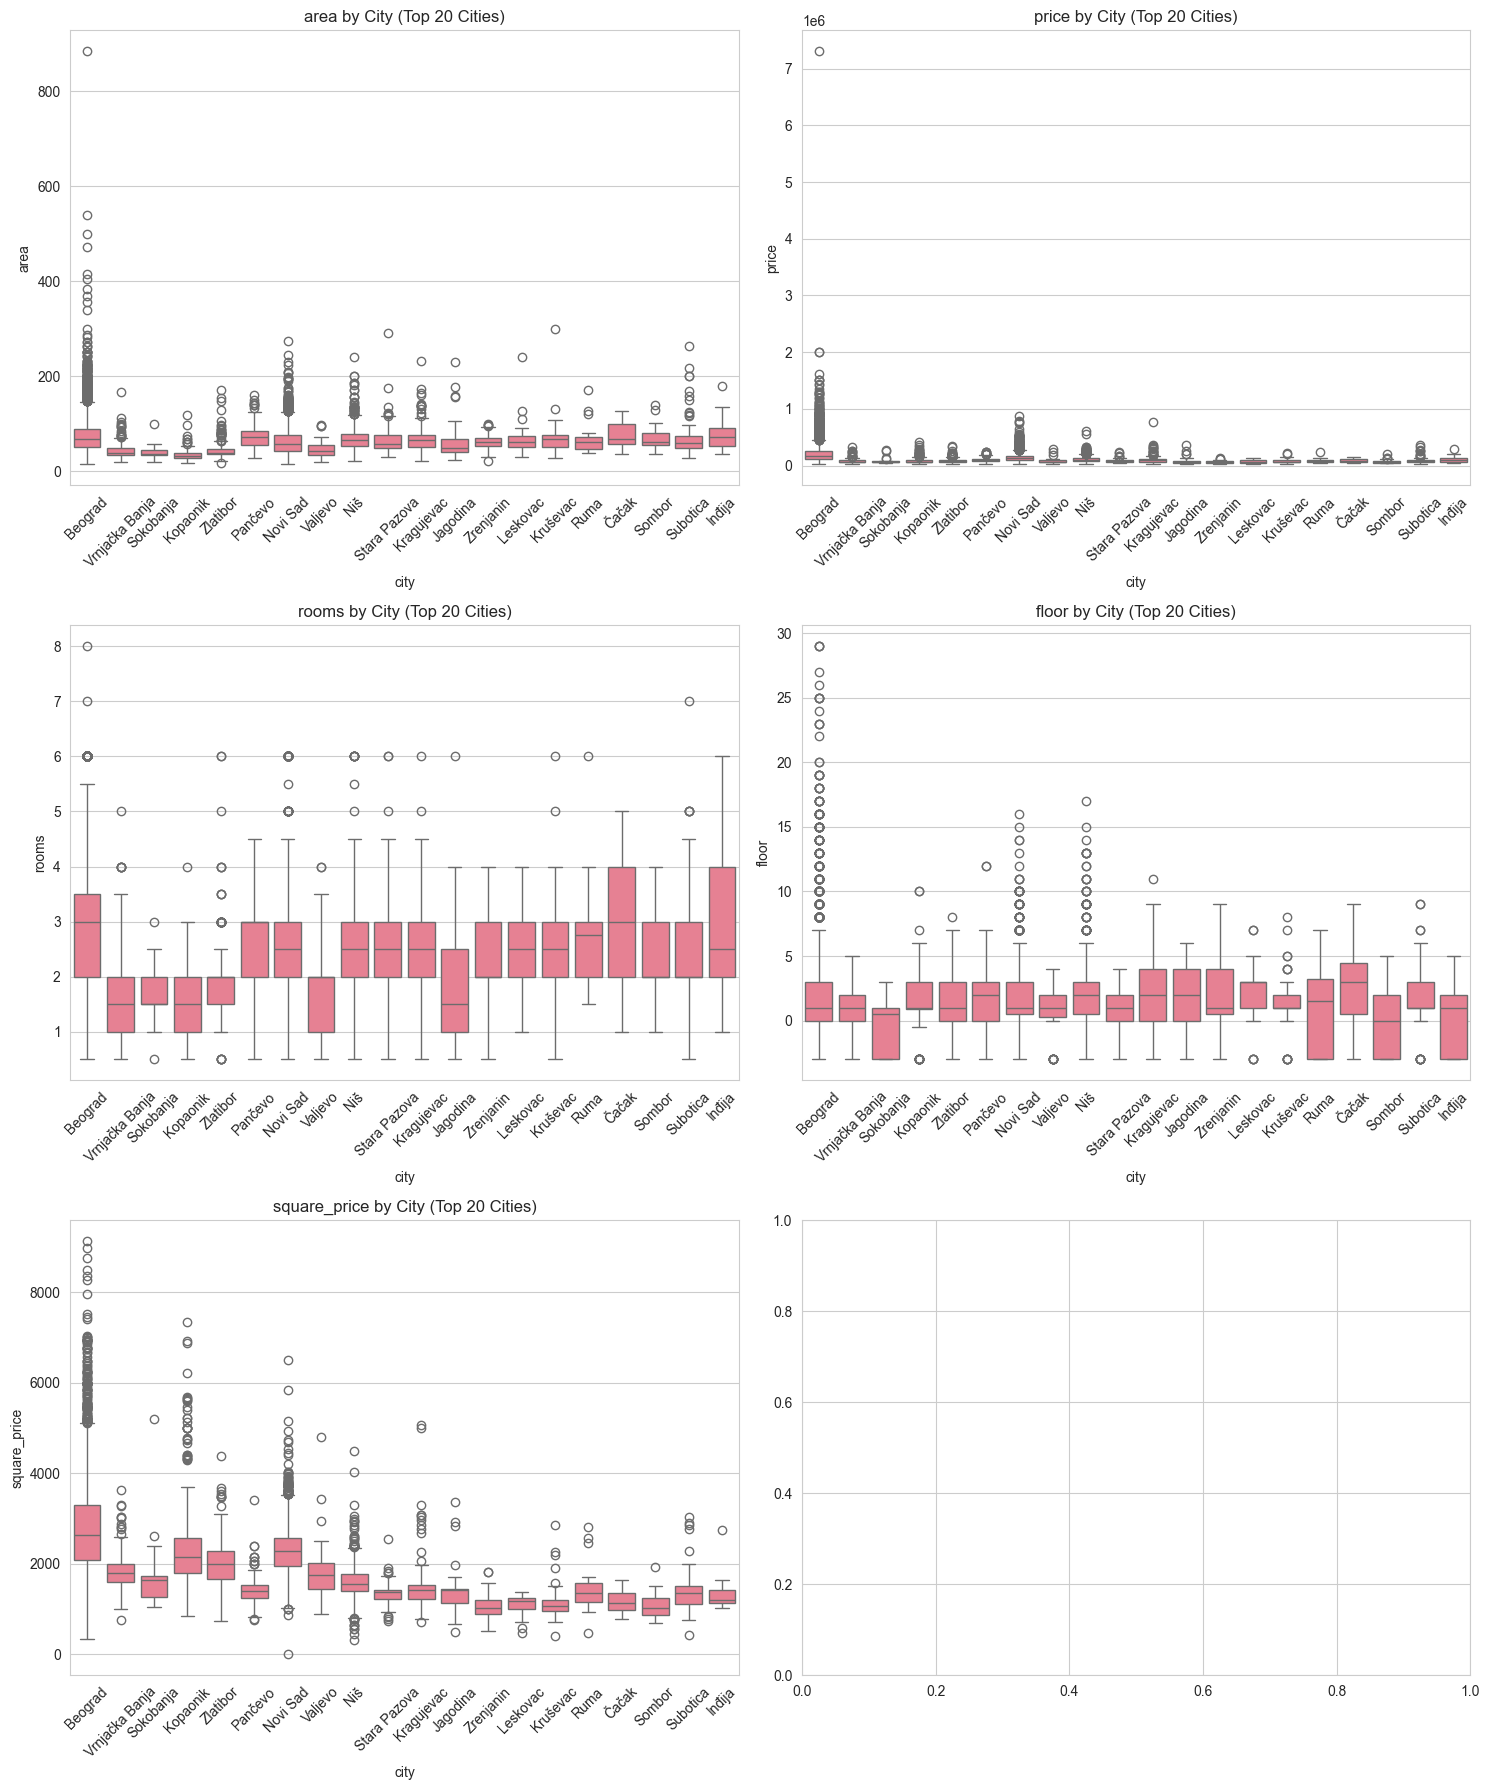

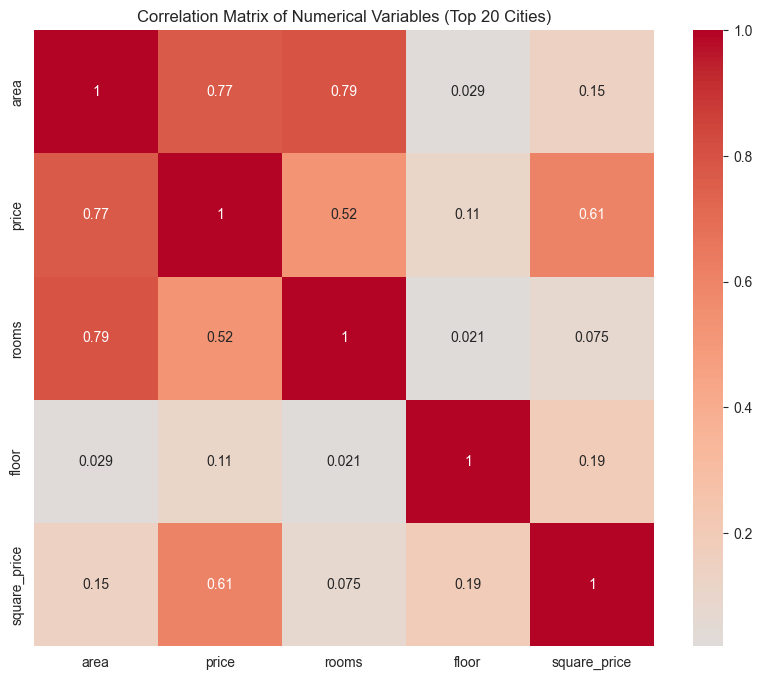


Top 20 cities by number of apartments:
city
Beograd           5618
Novi Sad          3141
Niš                844
Zlatibor           314
Vrnjačka Banja     313
Kragujevac         243
Kopaonik           192
Pančevo            182
Jagodina           144
Stara Pazova       115
Subotica            87
Zrenjanin           67
Kruševac            41
Sombor              41
Valjevo             39
Leskovac            26
Ruma                20
Čačak               19
Sokobanja           18
Inđija              16
Name: count, dtype: int64


In [7]:
numerical_cols = ['area', 'price', 'rooms', 'floor', 'square_price']

top_20_cities = df['city'].value_counts().nlargest(20).index
df_top_20 = df[df['city'].isin(top_20_cities)]

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.histplot(data=df_top_20, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col} (Top 20 Cities)')

plt.tight_layout()
output = "bar count per feature"
plt.savefig(graph_directory + output)
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=df_top_20, x='city', y=col, ax=axes[idx])
        axes[idx].set_title(f'{col} by City (Top 20 Cities)')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
output = "box feature per city"
plt.savefig(graph_directory + output)
plt.show()

correlation_matrix = df_top_20[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables (Top 20 Cities)')
output = "correlation matrix"
plt.savefig(graph_directory + output)
plt.show()

print("\nTop 20 cities by number of apartments:")
print(df['city'].value_counts().head(20))


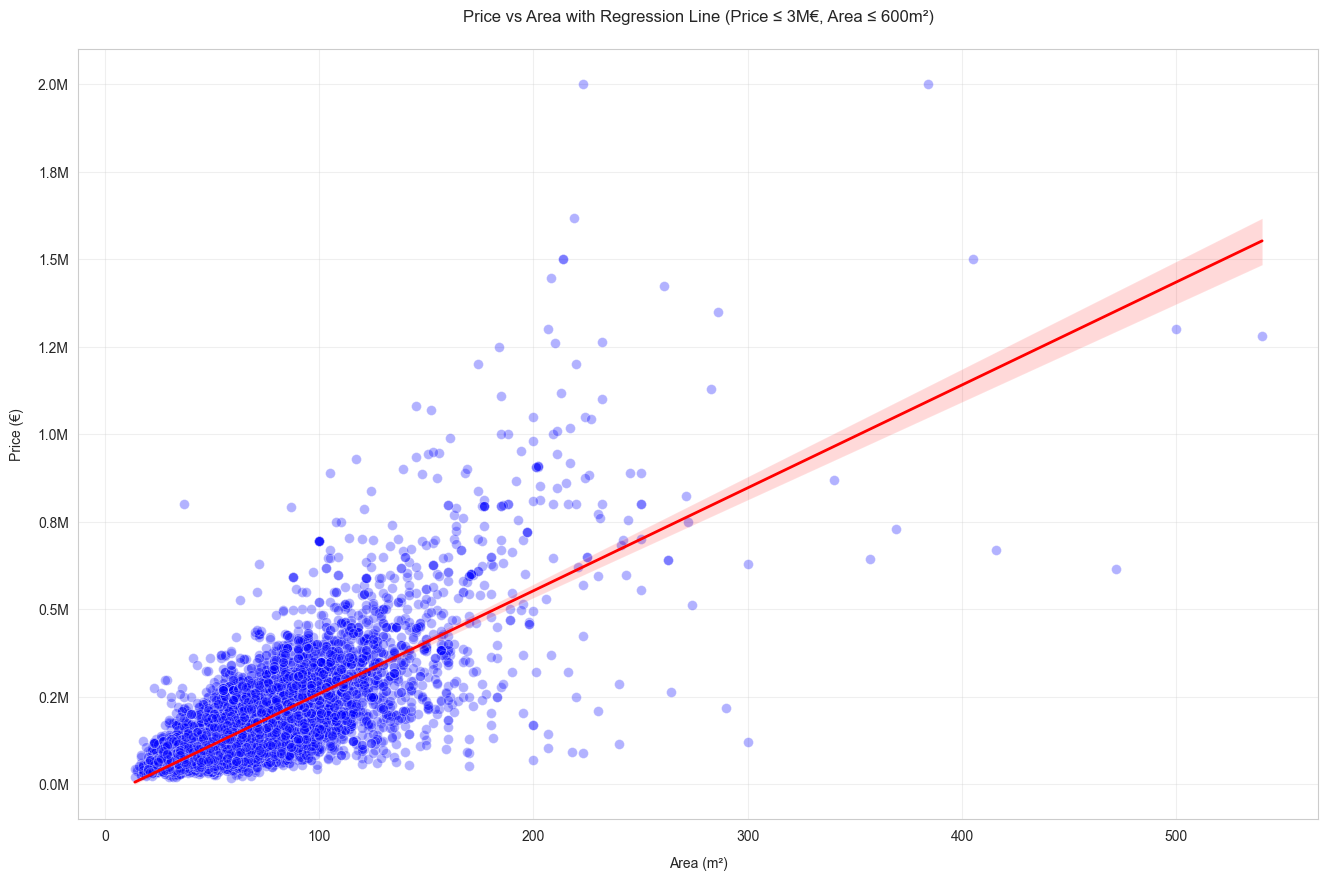

Correlation coefficient (larger range): 0.760


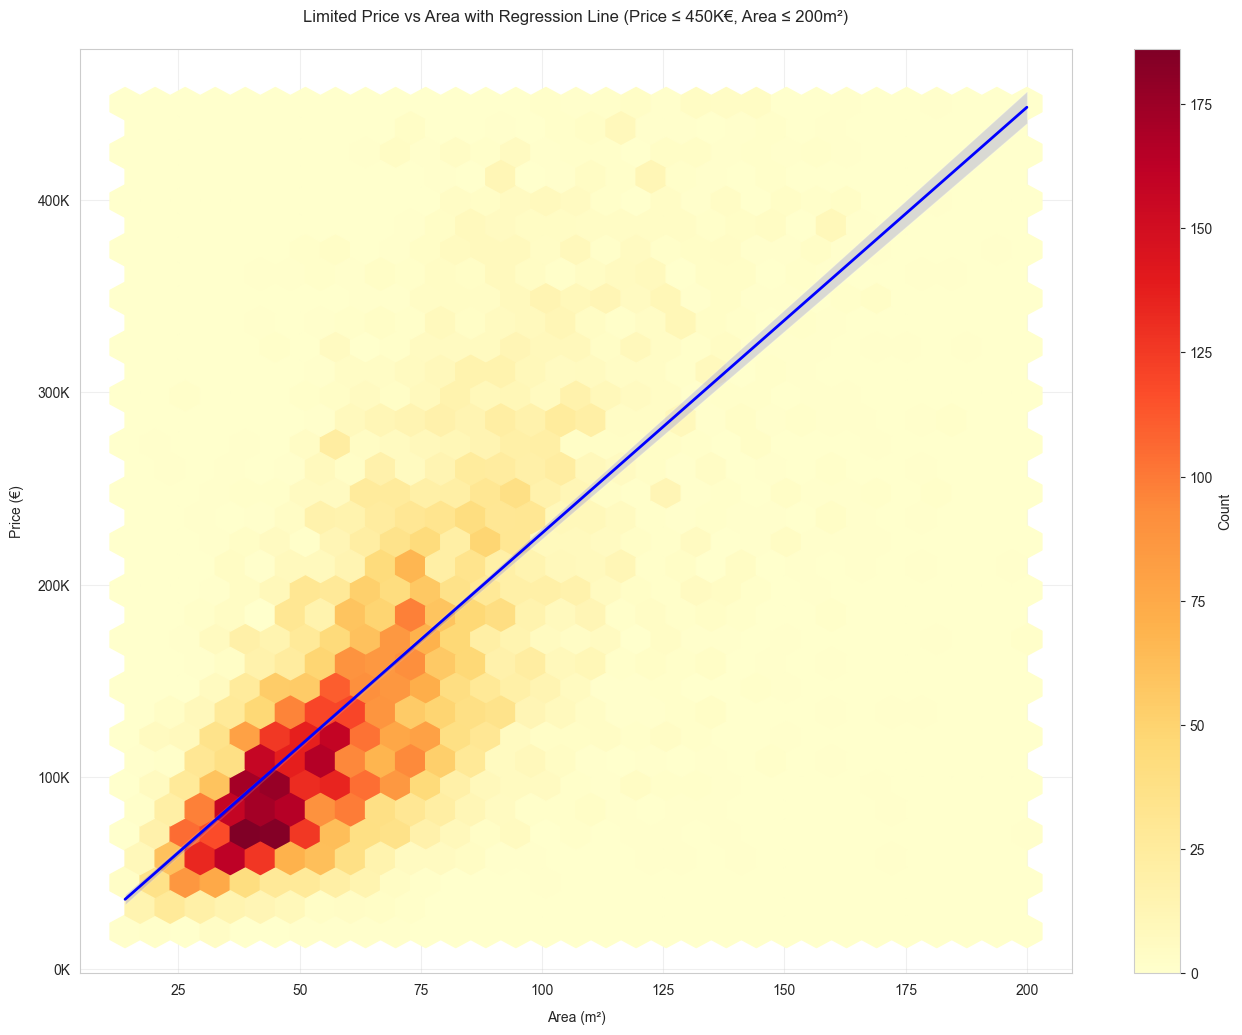

Correlation coefficient (smaller range): 0.702

Dataset Statistics:
Total properties in larger range (≤3M€, ≤600m²): 11703
Total properties in smaller range (≤450K€, ≤200m²): 11334


In [8]:
df_filtered_large = df[
    (df['price'] <= 3000000) & 
    (df['area'] <= 600)
]

plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_filtered_large, x='area', y='price', alpha=0.3, color='blue', s=50)
sns.regplot(data=df_filtered_large, x='area', y='price', scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Price vs Area with Regression Line (Price ≤ 3M€, Area ≤ 600m²)', pad=20)
plt.xlabel('Area (m²)', labelpad=10)
plt.ylabel('Price (€)', labelpad=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
plt.grid(True, alpha=0.3)
output = "general scatter plot"
plt.savefig(graph_directory + output)
plt.show()

correlation = df_filtered_large['area'].corr(df_filtered_large['price'])
print(f"Correlation coefficient (larger range): {correlation:.3f}")

df_filtered_small = df[
    (df['price'] <= 450000) & 
    (df['area'] <= 200)
]

plt.figure(figsize=(16, 12))
plt.hexbin(
    df_filtered_small['area'],
    df_filtered_small['price'], 
    gridsize=30, cmap='YlOrRd'
)
plt.colorbar(label='Count')

sns.regplot(
    data=df_filtered_small, 
    x='area', 
    y='price', 
    scatter=False, 
    color='blue', 
    line_kws={'linewidth': 2}
)

plt.title('Limited Price vs Area with Regression Line (Price ≤ 450K€, Area ≤ 200m²)', pad=20)
plt.xlabel('Area (m²)', labelpad=10)
plt.ylabel('Price (€)', labelpad=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
plt.grid(True, alpha=0.3)
output = "limited scatter plot"
plt.savefig(graph_directory + output)
plt.show()

correlation = df_filtered_small['area'].corr(df_filtered_small['price'])
print(f"Correlation coefficient (smaller range): {correlation:.3f}")

print("\nDataset Statistics:")
print(f"Total properties in larger range (≤3M€, ≤600m²): {len(df_filtered_large)}")
print(f"Total properties in smaller range (≤450K€, ≤200m²): {len(df_filtered_small)}")

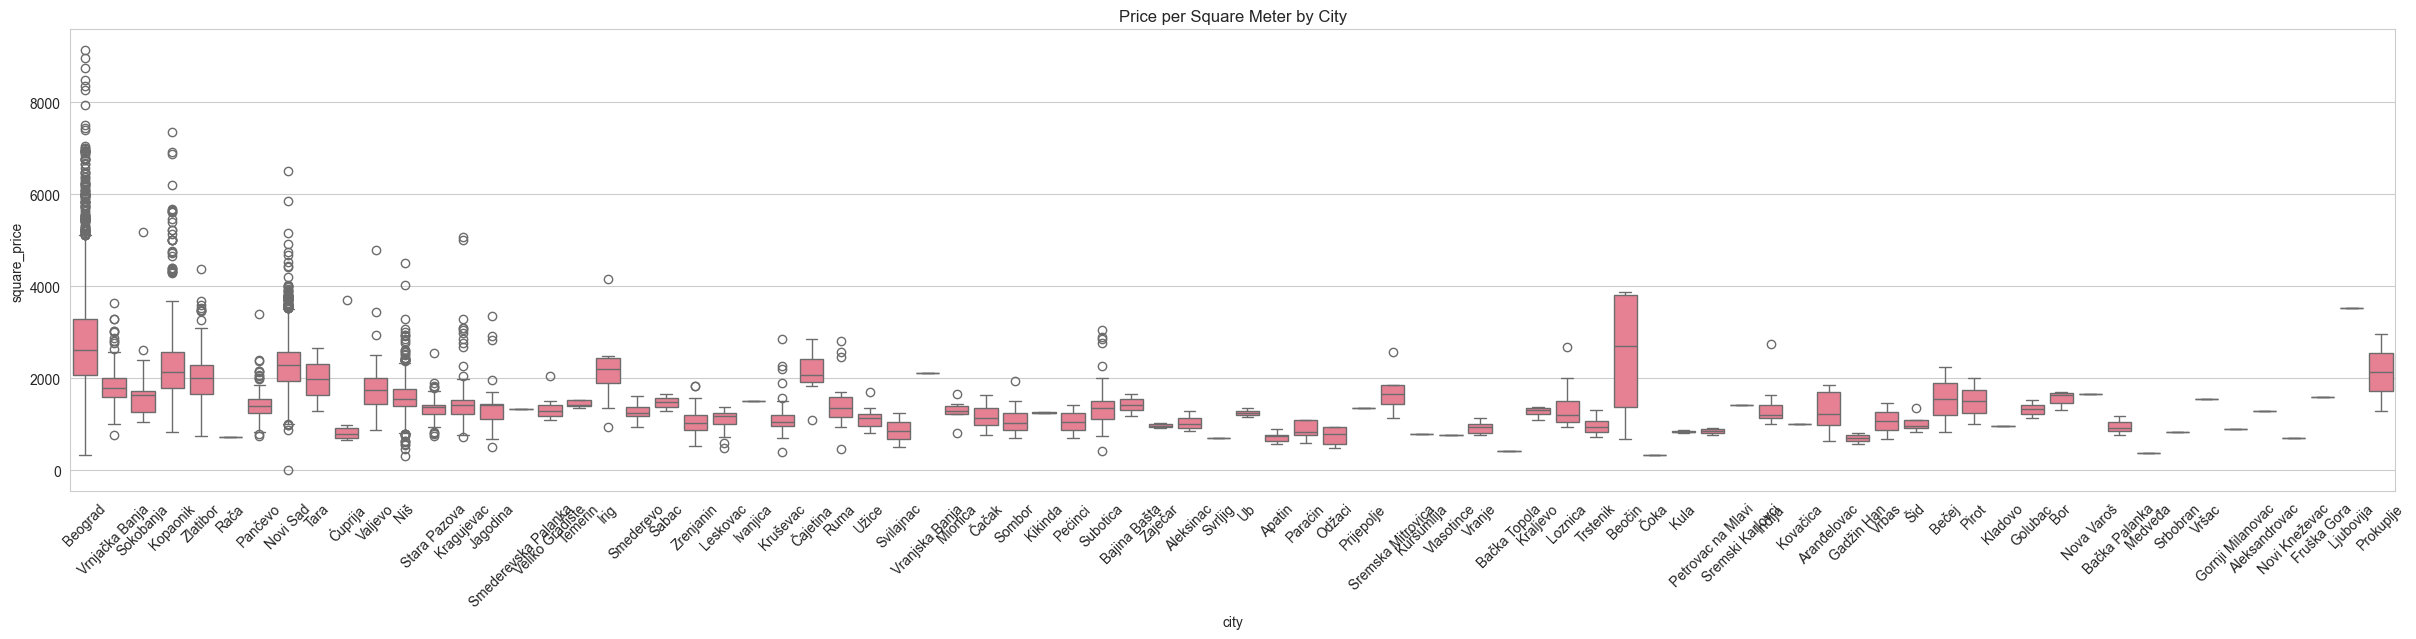

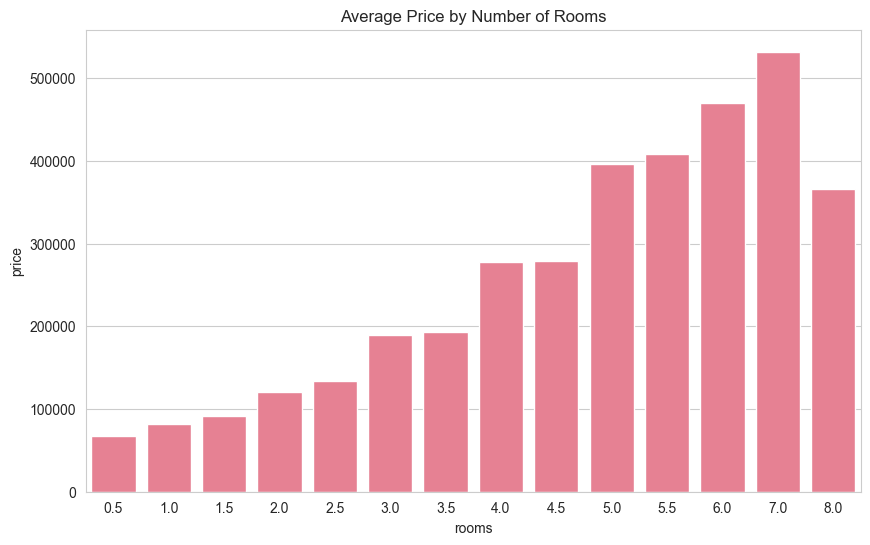


Price Statistics by City:
               count           mean            std      min      25%      50%  \
city                                                                            
Aleksandrovac    1.0   28600.000000            NaN  28600.0  28600.0  28600.0   
Aleksinac        3.0   83900.000000   37806.480926  60200.0  62100.0  64000.0   
Apatin           6.0   44916.666667   12674.449363  30000.0  34750.0  44500.0   
Aranđelovac      5.0  126910.800000  114158.262001  53000.0  58000.0  70000.0   
Bajina Bašta     3.0   83666.666667   12662.279942  70000.0  78000.0  86000.0   
...              ...            ...            ...      ...      ...      ...   
Čajetina         7.0   92485.714286   39523.639701  65000.0  72500.0  83000.0   
Čačak           19.0   86813.157895   32048.833581  40000.0  63500.0  85000.0   
Čoka             1.0   19800.000000            NaN  19800.0  19800.0  19800.0   
Šabac           10.0   98412.000000   36543.929364  41500.0  84000.0  99710.0   
Š

In [9]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df, x='city', y='square_price')
plt.title('Price per Square Meter by City')
plt.xticks(rotation=45)
output = "box plot square price per city"
plt.savefig(graph_directory + output)
plt.show()


avg_price_by_rooms = df.groupby('rooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_rooms, x='rooms', y='price')
plt.title('Average Price by Number of Rooms')
output = "bar plot average price per room count"
plt.savefig(graph_directory + output)
plt.show()

print("\nPrice Statistics by City:")
print(df.groupby('city')['price'].describe())

print("\nPrice per Square Meter Statistics by City:")
print(df.groupby('city')['square_price'].describe())

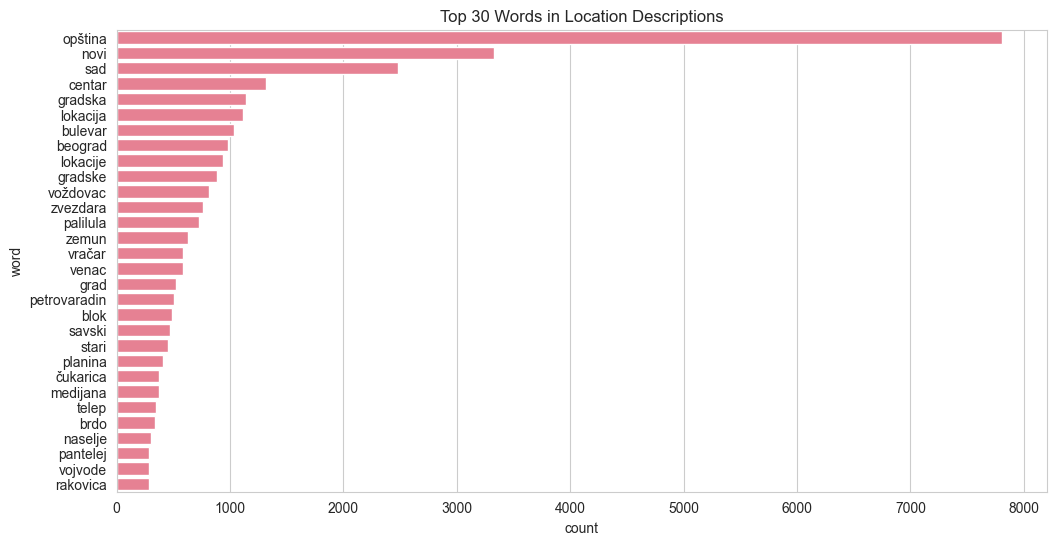

In [10]:
location_words = ' '.join(df['location'].astype(str)).lower().split()
word_freq = Counter(location_words)

common_words = {','}
word_freq = {k: v for k, v in word_freq.items() 
    if k not in common_words and not k.isdigit()}

words = pd.DataFrame(list(word_freq.items()), columns=['word', 'count'])
words = words.sort_values('count', ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(data=words, x='count', y='word')
plt.title('Top 30 Words in Location Descriptions')
output = "common words chart"
plt.savefig(graph_directory + output)
plt.show()

In [11]:
print("\nExtreme values in the dataset:")
for col in numerical_cols:
    print(f"\nTop 5 highest {col}:")
    print(df.nlargest(5, col)[[col, 'city', 'price']])


Extreme values in the dataset:

Top 5 highest area:
      area     city    price
56     885  Beograd  7310888
8027   540  Beograd  1280000
5533   500  Beograd  1300000
9669   472  Beograd   615000
953    416  Beograd   670000

Top 5 highest price:
        price     city    price
56    7310888  Beograd  7310888
6130  2000000  Beograd  2000000
7943  2000000  Beograd  2000000
8496  1617000  Beograd  1617000
6161  1500000  Beograd  1500000

Top 5 highest rooms:
       rooms      city    price
10413    8.0   Beograd   366000
10414    7.0   Beograd   800000
11233    7.0  Subotica   264000
56       6.0   Beograd  7310888
204      6.0   Beograd   629265

Top 5 highest floor:
      floor     city   price
1155   29.0  Beograd  320000
5295   29.0  Beograd  320000
8352   29.0  Beograd  320000
1161   27.0  Beograd  233000
2458   26.0  Beograd  325000

Top 5 highest square_price:
      square_price     city    price
9104          9125  Beograd   793888
6130          8969  Beograd  2000000
5477     

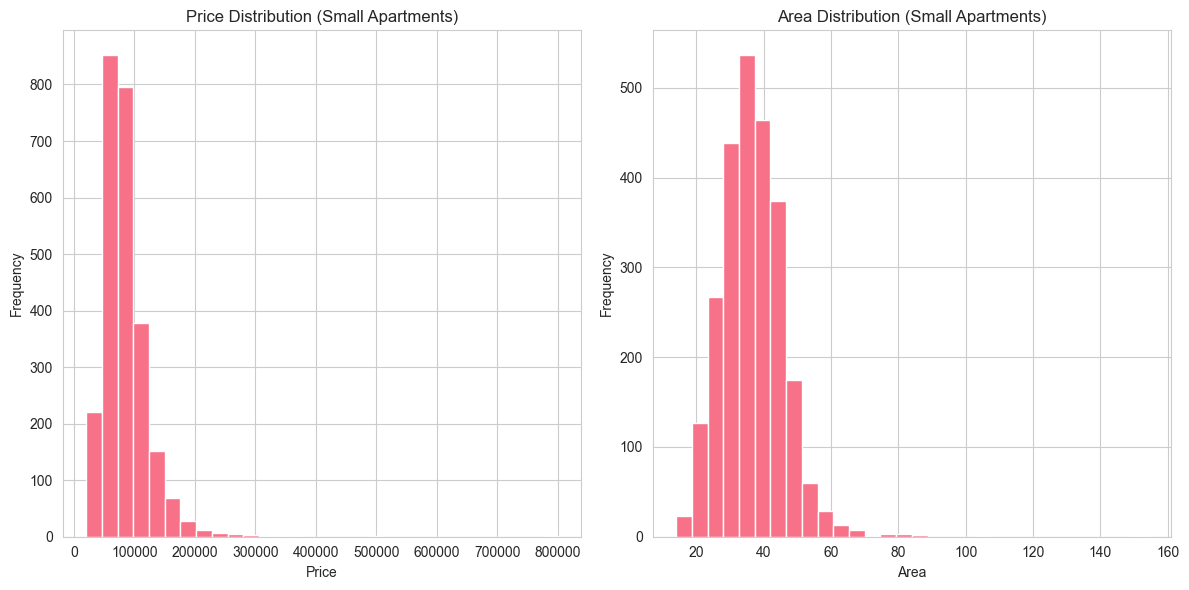

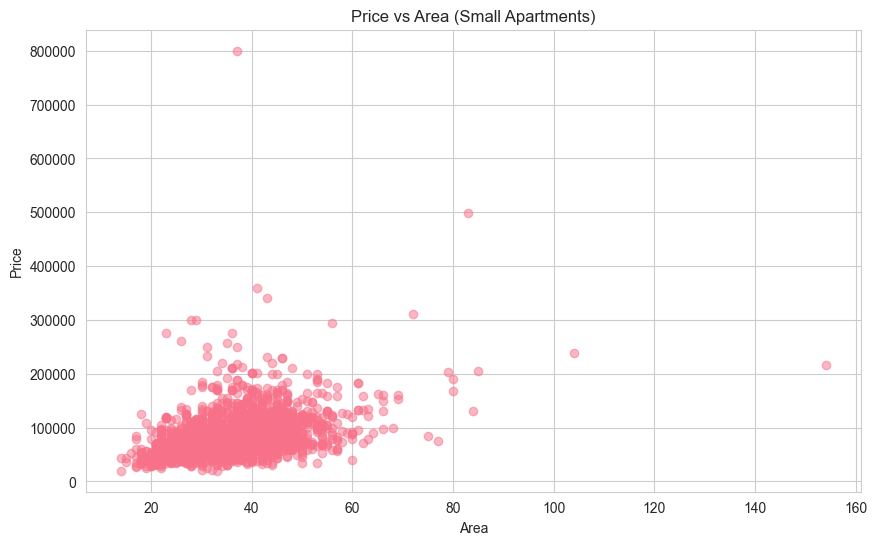

Small Apartments Analysis (0.5, 1, 1.5 rooms)
Total Small Apartments: 2524

Price Statistics:
Mean Price: 84,158.70
Median Price: 76,860.00
Min Price: 20,000.00
Max Price: 800,000.00
Price Standard Deviation: 39,465.71

Area Statistics:
Mean Area: 36.54
Median Area: 36.00
Min Area: 14.00
Max Area: 154.00
Area Standard Deviation: 9.37

Breakdown by Room Count:
      price                              area       
      count          mean   median       mean median
rooms                                               
0.5     439  67390.512528  61000.0  26.626424   26.0
1.0     793  82338.191677  73000.0  34.924338   34.0
1.5    1292  90973.639319  84500.0  40.890867   40.0

Top 10 Cities for Small Apartments:
               price                              area       
               count          mean   median       mean median
city                                                         
Beograd          893  99024.276596  92000.0  37.694289   37.0
Novi Sad         683  85254.585652 

In [12]:
# Filter for small apartments (0.5, 1, and 1.5 rooms)
small_apartments = df[df['rooms'] <= 1.5]

# Basic statistics
stats = {
    'Total Apartments': len(small_apartments),
    'Price Statistics': {
        'Mean Price': small_apartments['price'].mean(),
        'Median Price': small_apartments['price'].median(),
        'Min Price': small_apartments['price'].min(),
        'Max Price': small_apartments['price'].max(),
        'Price Standard Deviation': small_apartments['price'].std()
    },
    'Area Statistics': {
        'Mean Area': small_apartments['area'].mean(),
        'Median Area': small_apartments['area'].median(),
        'Min Area': small_apartments['area'].min(),
        'Max Area': small_apartments['area'].max(),
        'Area Standard Deviation': small_apartments['area'].std()
    }
}

# Breakdown by room count
room_breakdown = small_apartments.groupby('rooms').agg({
    'price': ['count', 'mean', 'median'],
    'area': ['mean', 'median']
})

# City analysis
city_analysis = small_apartments.groupby('city').agg({
    'price': ['count', 'mean', 'median'],
    'area': ['mean', 'median']
}).sort_values(('price', 'count'), ascending=False)

# Price distribution plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
small_apartments['price'].hist(bins=30)
plt.title('Price Distribution (Small Apartments)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Area distribution plot
plt.subplot(122)
small_apartments['area'].hist(bins=30)
plt.title('Area Distribution (Small Apartments)')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Price vs Area scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(small_apartments['area'], small_apartments['price'], alpha=0.5)
plt.title('Price vs Area (Small Apartments)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Print results
print("Small Apartments Analysis (0.5, 1, 1.5 rooms)")
print("="*50)
print(f"Total Small Apartments: {stats['Total Apartments']}")

print("\nPrice Statistics:")
for key, value in stats['Price Statistics'].items():
    print(f"{key}: {value:,.2f}")

print("\nArea Statistics:")
for key, value in stats['Area Statistics'].items():
    print(f"{key}: {value:,.2f}")

print("\nBreakdown by Room Count:")
print(room_breakdown)

print("\nTop 10 Cities for Small Apartments:")
print(city_analysis.head(10))

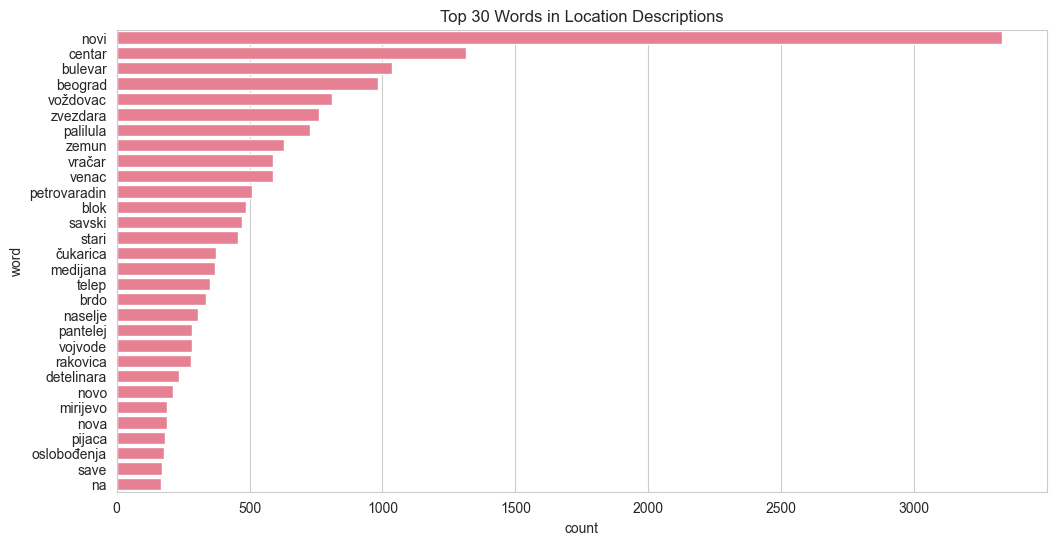

In [15]:
# Most common locations
location_words = ' '.join(df['location'].astype(str)).lower().split()
word_freq = Counter(location_words)

common_words = {',', 'sad', 'gradska', 'lokacija', 'opština', 'lokacije', 'gradske', 'grad', 'planina'}
word_freq = {k: v for k, v in word_freq.items() 
    if k not in common_words and not k.isdigit()}

words = pd.DataFrame(list(word_freq.items()), columns=['word', 'count'])
words = words.sort_values('count', ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(data=words, x='count', y='word')
plt.title('Top 30 Words in Location Descriptions')
output = "common locations chart"
plt.savefig(graph_directory + output)
plt.show()